In [1]:
from testing_criterions import CPTDigraphManager
from diblob import DigraphManager


def extract_k_test_cases(test_cases, delimiter = ',', source='S', sink='T', k=1):   

    test_case_str = ""
    test_case_list = []
    breakers = {f"{sink}{source}{number}" for number in range(k)}

    for elem in test_cases:
        if elem[1] in breakers:
            test_case_list.append(test_case_str[:-1])
            test_case_str = ""
        else:
            test_case_str += f"{elem[1]}{delimiter}"
    test_case_list[0] = source + test_case_list[0]
    return test_case_list

<span style="font-size: 22px;">Structure created by algorithm for different cases:</span>

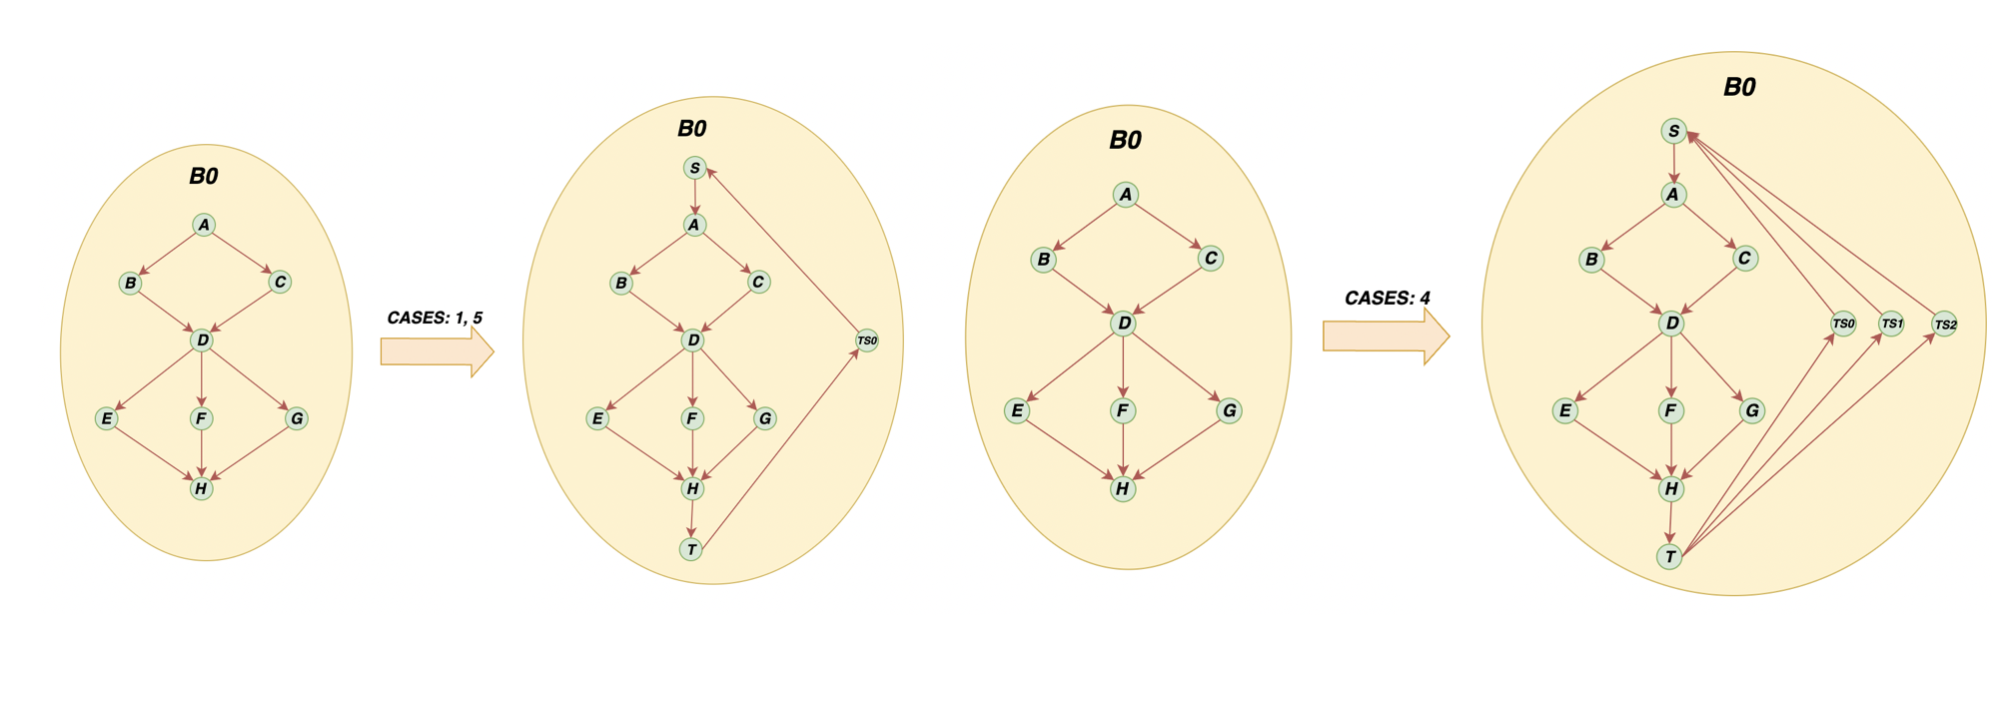

In [2]:
def generate_test_cases(digraph_manager, 
                        source='S', 
                        sink='T', 
                        cost_function={}, 
                        additional_edge_cost=2, 
                        default_cost=1,
                        k=1, 
                        delimiter=','):
    
    if source in digraph_manager or sink in digraph_manager:
        raise Exception('sink/source should be unique over digraph namespace!')
    
    dict_json_representation = dict(digraph_manager(digraph_manager.root_diblob_id))
    cpt = CPTDigraphManager(dict_json_representation, cost_function={})

    minimal_elements, maximal_elements = cpt.get_edge_elements()
    
    nodes_to_add = [sink + source + str(number) for number in range(k)] + [sink, source]
    cpt.add_nodes(*nodes_to_add)

    minimal_edges = [(source, node_id) for node_id in minimal_elements]
    maximal_edges = [(node_id, sink) for node_id in maximal_elements]

    if not minimal_edges or not maximal_edges:
        raise Exception('Should be at least minimal/maximal element in the diblob!')
    
    sink_source_edges = [(sink, sink + source + str(number)) for number in range(k)] +\
                        [(sink + source + str(number), source) for number in range(k)]
    
    new_edges = minimal_edges + maximal_edges + sink_source_edges
    cpt.connect_nodes(*new_edges)

    
    cost_function_update_dict = {edge_id: cost_function.get(edge_id, 1)*default_cost
                                 for edge_id in cpt.edges}

    for number in range(k):
        cost_function_update_dict[(sink, sink + source + str(number))] = additional_edge_cost
        cost_function_update_dict[(sink + source + str(number), source)] = additional_edge_cost

    cpt.update_cost_function(cost_function_update_dict)

    cpt, cost = cpt.compute_cpt(start_node=source)
    return extract_k_test_cases(cpt, delimiter, source, sink, k), cost


In [3]:
cpt_digraph_manager = DigraphManager({"B0": {}})
cpt_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')
cpt_digraph_manager.connect_nodes(('A', 'C'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('C', 'F'),
                       ('D', 'I'), ('D', 'G'), ('E', 'G'), ('E', 'H'), ('F', 'H'))
                       

# Case 5
number_of_nodes = len(cpt_digraph_manager.nodes)
weight = number_of_nodes * (number_of_nodes + 1) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt_digraph_manager,
                                       default_cost=weight)
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 5: Minimal total cost (any number of test cases)
test_cases=['SB,C,F,H,T', 'S,A,C,E,H,T', 'S,A,C,E,G,T', 'S,A,C,D,I,T', 'S,A,C,D,G,T']
cost=1145.0



In [4]:
cpt2_digraph_manager = DigraphManager({"B0": {}})
cpt2_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G')
cpt2_digraph_manager.connect_nodes(('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
                       ('D', 'F'), ('E', 'F'), ('F', 'B'), ('F', 'G'))

# Case 1
weight = number_of_nodes * (number_of_nodes + 1) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=weight**3)
print("Case 1: Minimal total number of test cases (without cost)")
print(f"{test_cases=}")
print(f"{cost=}\n")

test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       cost_function={('F', 'B'): 20})
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 1: Minimal total number of test cases (without cost)
test_cases=['SA,B,C,F,B,D,F,B,E,F,G,T']
cost=182790.0

Case 5: Minimal total cost (any number of test cases)
test_cases=['SA,B,C,F,G,T', 'S,A,B,D,F,B,E,F,G,T']
cost=1538.0



In [5]:

cpt3_digraph_manager = DigraphManager({"B0": {}})
cpt3_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G')
cpt3_digraph_manager.connect_nodes(('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
                       ('D', 'F'), ('E', 'F'), ('F', 'G'))

# Case 3
K=5
test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=(weight*K)**2,
                                       k=K)

print("Case 4: Set number of test cases")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 4: Set number of test cases
test_cases=['SA,B,C,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,D,F,B,E,F,G,T']
cost=507735.0



In [8]:
#Example from diblob application

cpt4_digraph_manager = DigraphManager({
"B0": {
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["C3", "A3", "B3", "D3"]}],
    "SSC_3": {
        "C3": ["D3", {"DAG": ["D"]}],
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "F": [],
    "E": [],
    "D": ["E", "F"],
    "SSC_1": {
        "SSC_2": {
            "A2": ["B2", {"SSC_1": ["B1"]}],
            "C2": ["D2", {"SSC_1": ["B1"]}],
            "D2": ["A2", {"SSC_1": ["B1"]}],
            "B2": ["C2", {"SSC_1": ["B1"]}],
        },
        "C1": [{"SSC_2": ["A2", "C2", "D2", "B2"]}, {"DAG": ["D"]}],
        "B1": ["C1", {"DAG": ["D"]}],
    },
},
})
cpt4_digraph_manager.flatten('SSC_2', 'SSC_1', 'SSC_3')
weight = (number_of_nodes + 1) * (number_of_nodes) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=1)
print("Case 1: Minimal total number of test cases (without cost)")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of tests: {len(test_cases)}\n")

test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=weight,
                                       cost_function={('6', '2'): 70})
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of tests: {len(test_cases)}\n")

K=7
weight = (number_of_nodes + K + 1) * (number_of_nodes + K) / 2
test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=1,
                                       additional_edge_cost=weight**2,
                                       k=K)

print("Case 4: Set number of test cases")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of test == K: {len(test_cases)}\n")

Case 1: Minimal total number of test cases (without cost)
test_cases=['SA,D3,A3,C3,D3,A3,B3,C3,D3,D,F,T', 'S,A,B1,C1,C2,D2,A2,B2,C2,B1,C1,A2,B1,C1,D2,B1,C1,B2,B1,D,F,T', 'S,A,C1,D,F,T', 'S,A,C3,D,F,T', 'S,A,B3,D,E,T', 'S,A,A3,D,F,T']
cost=2397.0
number of tests: 6

Case 5: Minimal total cost (any number of test cases)
test_cases=['SA,D3,A3,C3,D3,A3,B3,C3,D3,D,F,T', 'S,A,B1,C1,C2,D2,A2,B2,C2,B1,C1,A2,B1,C1,D2,B1,C1,B2,B1,D,F,T', 'S,A,C1,D,F,T', 'S,A,C3,D,F,T', 'S,A,B3,D,E,T', 'S,A,A3,D,F,T']
cost=2409.0
number of tests: 6

Case 4: Set number of test cases
test_cases=['SA,D3,A3,C3,D,F,T', 'S,A,B1,C1,C2,D2,A2,B2,C2,B1,C1,A2,B1,C1,D2,B1,C1,B2,B1,D,F,T', 'S,A,C1,D,F,T', 'S,A,C3,D3,D,F,T', 'S,A,B3,C3,D,F,T', 'S,A,A3,B3,D,E,T', 'S,A,A3,D,F,T']
cost=259000.0
number of test == K: 7

